# Stacked LSTM

In [4]:
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array
# Difference between required outputs for new LSTM layers, and Dense layers. 
# Difference in return_sequences as False and True
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(3,1)))
model.compile(optimizer='adam', loss='mse')
# One sequence of 3 floats.
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# Make and show prediction
print(model.predict(data))

[[[0.02244918]
  [0.05979618]
  [0.10442455]]]


In [5]:
model = Sequential()
model.add(LSTM(1, input_shape=(3,1)))
model.compile(optimizer='adam', loss='mse')
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[-0.02428075]]


In [6]:
# The return sequence makes the layer output a value for each input value rather than a single output value

## Stacking LSTM layers for predicting values for a damped sinewave sequence

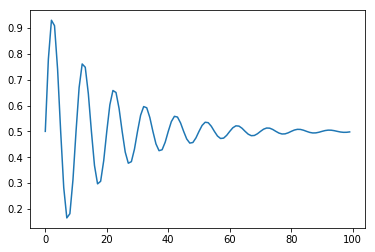

In [17]:
from math import sin, exp, cos, pi
from matplotlib import pyplot
from random import randint, uniform
%matplotlib inline

# Define example sequence of what we want
length = 100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

# Plot sequence for visualisation of what we are trying to do.
pyplot.plot(sequence)

In [19]:
# Example setup

In [21]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_sequences, output):
    X, y = list(), list()
    for _ in range(n_sequences):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_sequences, length, 1)
    y = array(y).reshape(n_sequences, output)
    return X, y

[[[0.5       ]
  [0.66398982]
  [0.79554792]
  [0.88184425]
  [0.91639191]
  [0.89929833]
  [0.83672229]
  [0.73966463]
  [0.62228786]
  [0.5       ]
  [0.3875463 ]
  [0.2973322 ]
  [0.23815571]
  [0.21446514]
  [0.22618683]
  [0.26909746]
  [0.33565338]
  [0.41614283]
  [0.5       ]
  [0.57711353]]

 [[0.5       ]
  [0.77647905]
  [0.9208462 ]
  [0.89591044]
  [0.73018809]
  [0.5       ]
  [0.29628175]
  [0.1899076 ]
  [0.20828104]
  [0.33039035]
  [0.5       ]
  [0.65010586]
  [0.7284856 ]
  [0.71494749]
  [0.6249736 ]
  [0.5       ]
  [0.38939739]
  [0.3316448 ]
  [0.34162009]
  [0.40791562]]

 [[0.5       ]
  [0.64432656]
  [0.75643451]
  [0.82969269]
  [0.8620361 ]
  [0.85558173]
  [0.81589275]
  [0.75100644]
  [0.67034908]
  [0.58365605]
  [0.5       ]
  [0.42700634]
  [0.37030736]
  [0.33325678]
  [0.31689898]
  [0.3201633 ]
  [0.34023614]
  [0.37305262]
  [0.41384536]
  [0.45769066]]]

[[0.63897658 0.67955601 0.69580149 0.68776351 0.65833815]
 [0.5        0.58149539 0.62404928 

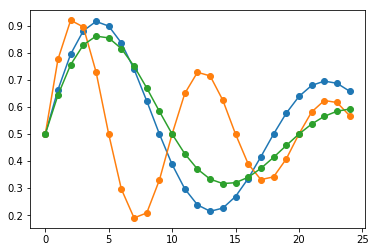

In [36]:
# See what the generate examples outpus 
X, y = generate_examples(20, 3, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
print(X)
print()
print(y)